In [12]:
import numpy as np
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [13]:
# Генерируем выборку размера N из распределения Exp(1)
N = 10**4
th = 1
exp = st.expon(th)
X = exp.rvs(N)

In [14]:
# Функция, возвращающая для заданного k массив оценок для всех n <= N
def f(X, k): 
    X_k = list(map(lambda x: x**k, X))
    # Считаем выборочный k-ый момент для каждого n
    X_k_mean = np.cumsum(X_k) / np.arange(1, N+1)
    return (math.factorial(k) / X_k_mean) ** (1/k)

In [15]:
# Набор значений k, для которых будем исследовать оценку
K = list(range(2, 21, 2))
Estimators = []
# Для каждого k полученные оценки добавляем в Estimators
for k in K:
    Estimators.append(f(X, k))

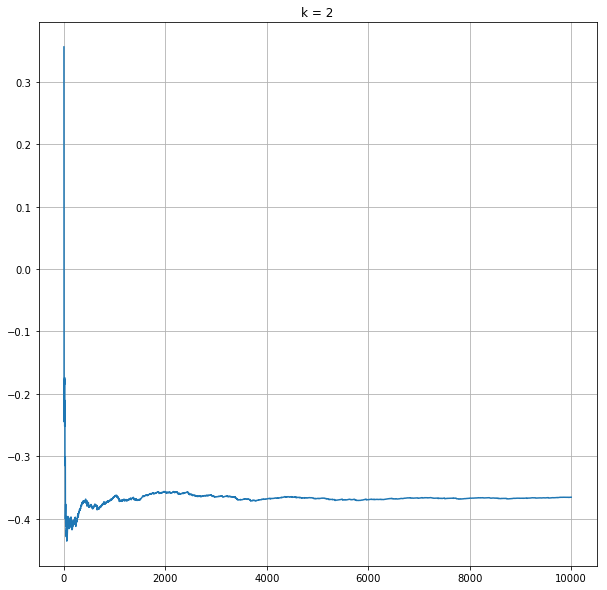

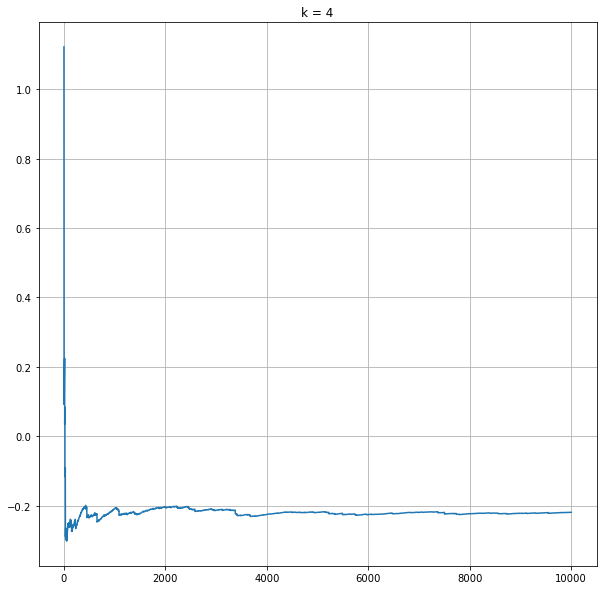

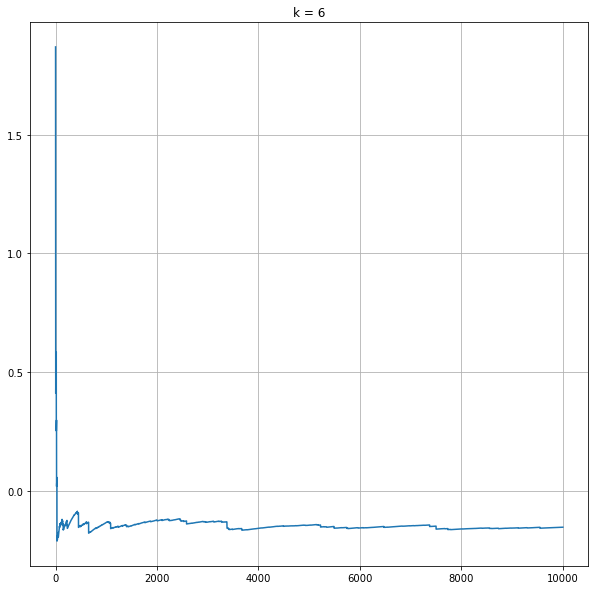

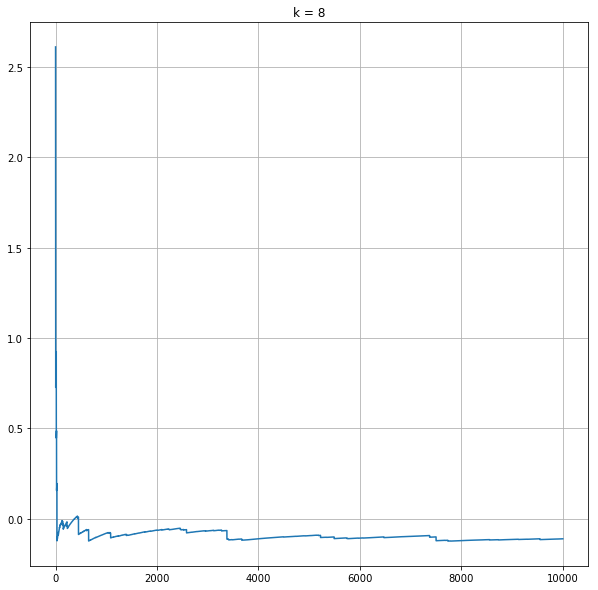

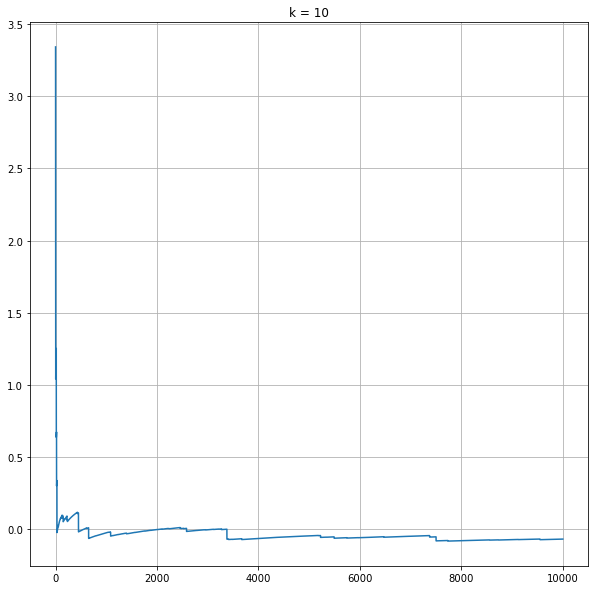

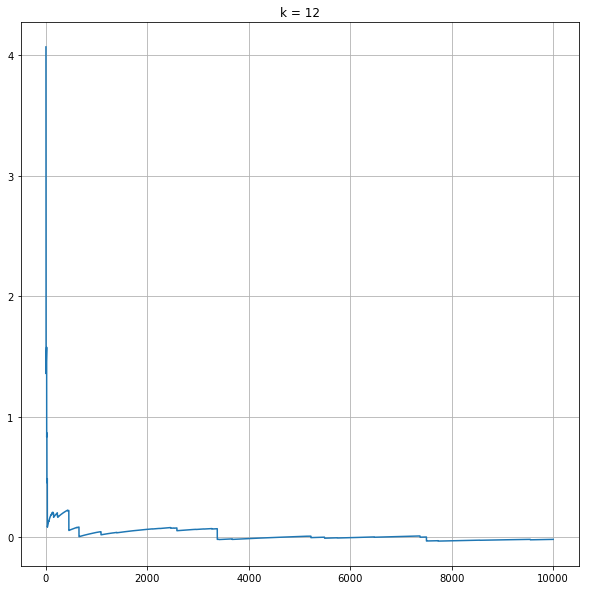

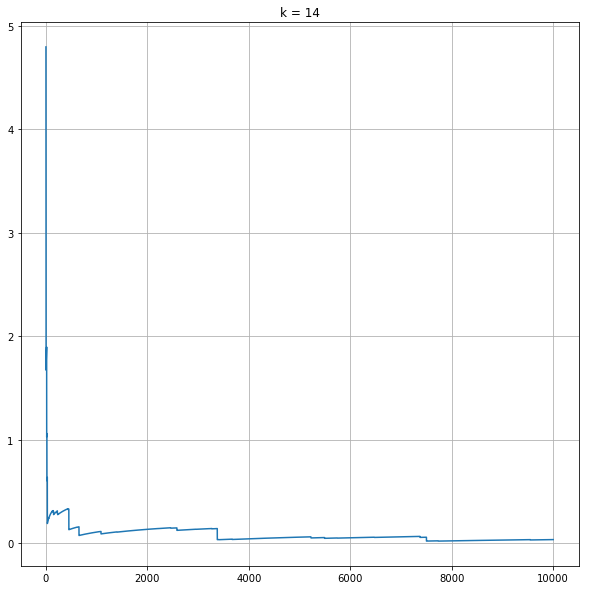

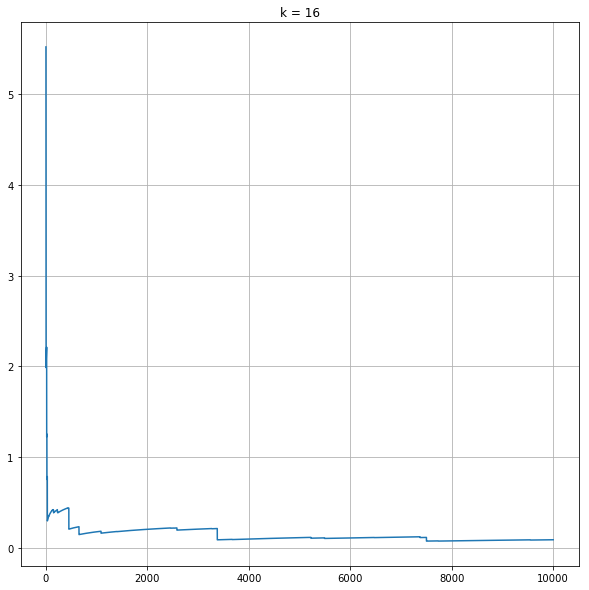

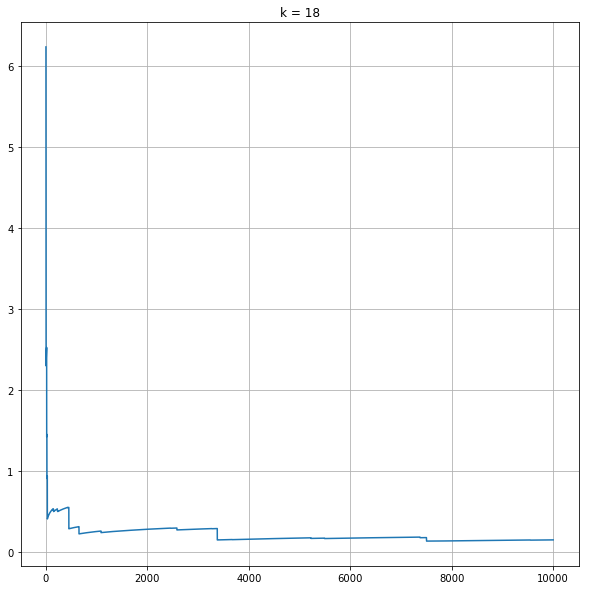

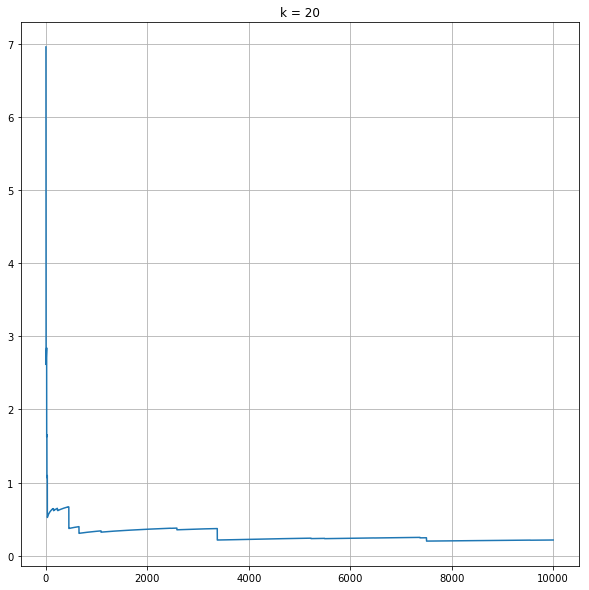

In [16]:
X_f = list(range(N))
for i in range(len(K)):
    plt.figure(figsize=(10,10))
    plt.subplot()
    plt.grid()
    plt.plot( X_f, np.array(Estimators[i])-th )
    plt.title('k = ' + str(K[i]))
    plt.show()

Видим, что при k в диапозоне от 10 до 16 оценка сходится достаточно хорошо, при остальных же значениях она сходится хуже.